__IMPORTING THE LIBRARIES__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

__LOADING TRAIN AND TEST DATASETS__

In [72]:
Df_train = pd.read_excel(r"C:\Users\Dell\Downloads\ML Advanced Exam Paper\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")
Df_test = pd.read_excel(r"C:\Users\Dell\Downloads\ML Advanced Exam Paper\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Test.xlsx", engine='openpyxl')

__SHAPE OF TRAININF AND TESTING DATA__

In [74]:
print("Shape of training data:", Df_train.shape)
print("Shape of testing data:", Df_test.shape)

Shape of training data: (10683, 11)
Shape of testing data: (2671, 10)


__FINDING THE DUPLICATES__

In [75]:
print(Df_train.duplicated().sum())
print(Df_test.duplicated().sum())

220
26


In [76]:
Df_train.drop_duplicates(keep='first',inplace=True)
Df_train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [77]:
Df_test.drop_duplicates(keep='first',inplace=True)
Df_test.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


__FINDING THE NULL VALUES__

In [79]:
print(Df_train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [80]:
print(Df_test.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


__DESCRIPTIVE SATISTICS__

In [81]:
Df_train.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


In [82]:
Df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,886,143,1127,1127,620,61,112,121,1427,2126


In [83]:
Df_train['Route'] = Df_train['Route'].fillna(Df_train['Route'].mode()[0])
Df_train['Total_Stops'] = Df_train['Total_Stops'].fillna(Df_train['Total_Stops'].mode()[0])

In [84]:
Df_train['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)
Df_test['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [85]:
Df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10463 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10463 non-null  int64 
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 980.9+ KB


__EXTRACTING DATE,MONTH,YEAR FROM DATE OF JOURNEY COLUMN__

In [86]:
Df_train['Date'] = Df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
Df_train['Month'] = Df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
Df_train['Year'] = Df_train['Date_of_Journey'].str.split('/').str[2].astype(int)

In [87]:
Df_test['Date'] = Df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
Df_test['Month'] = Df_test['Date_of_Journey'].str.split('/').str[1].astype(int)

In [88]:
Df_train.drop('Date_of_Journey', axis=1, inplace=True)
Df_test.drop('Date_of_Journey', axis=1, inplace=True)

In [89]:
Df_train['Arrival_Time'] = Df_train['Arrival_Time'].str.split(' ').str[0]
Df_test['Arrival_Time'] = Df_test['Arrival_Time'].str.split(' ').str[0]

In [90]:
Df_train['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [91]:
Df_train['Source'].value_counts()

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [92]:
Df_train['Destination'].value_counts()

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

__EXPLORATORY DATA ANALYSIS (EDA)
a) Which airline is most preferred airline
c) Find the majority of the flights take off from which source
d) Find maximum flights land in which destination__

In [93]:
preferred_airline = Df_train['Airline'].mode()[0]
print(f"The most preferred airline is: {preferred_airline}")


majority_source = Df_train['Source'].mode()[0]
print(f"Majority of flights take off from: {majority_source}")


max_destination = Df_train['Destination'].mode()[0]
print(f"Maximum flights land in: {max_destination}")

The most preferred airline is: Jet Airways
Majority of flights take off from: Delhi
Maximum flights land in: Cochin


In [94]:
Df_train.drop('Additional_Info', axis=1, inplace=True)
Df_test.drop('Additional_Info', axis=1, inplace=True)

__Comparing Independent Features with Target Feature to Check the Impact on Price
a) Which airline has the highest price?__

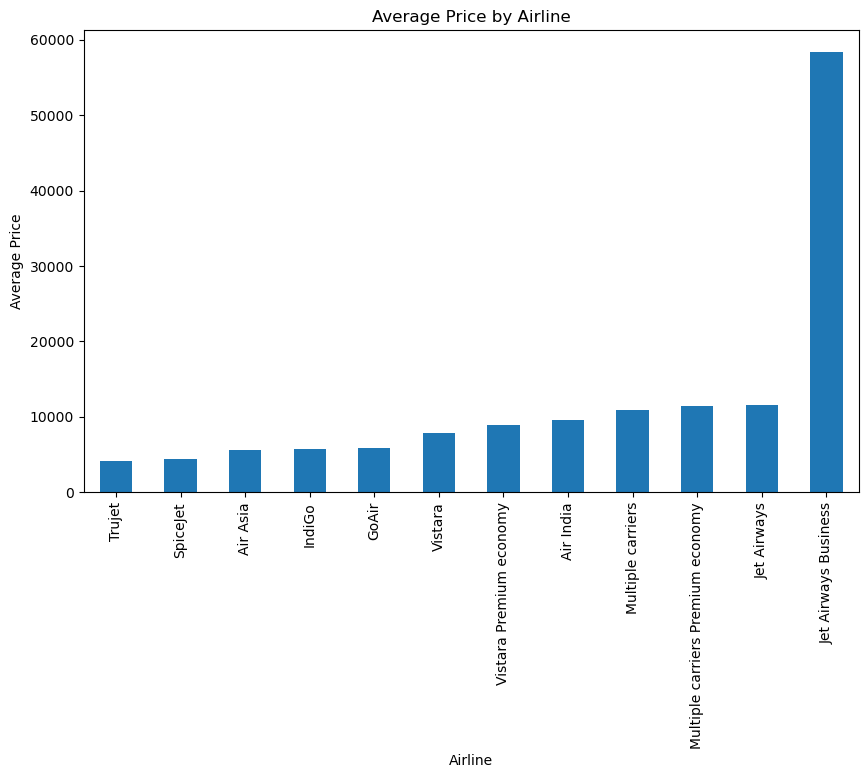

The airline with the highest average price is: Jet Airways Business


In [100]:
# Group by 'Airline' and calculate the average price
avg_price_by_airline = Df_train.groupby('Airline')['Price'].mean()

# Plot the average price by airline
plt.figure(figsize=(10,6))
avg_price_by_airline.sort_values().plot(kind='bar')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

# Find the airline with the highest average price
max_price_airline = avg_price_by_airline.idxmax()
print(f"The airline with the highest average price is: {max_price_airline}")


__DATA VISUALIZATION
a) Which airline is most preferred airline
c) Find the majority of the flights take off from which source
d) Find maximum flights land in which destination__

In [101]:
sns.set(style="whitegrid")

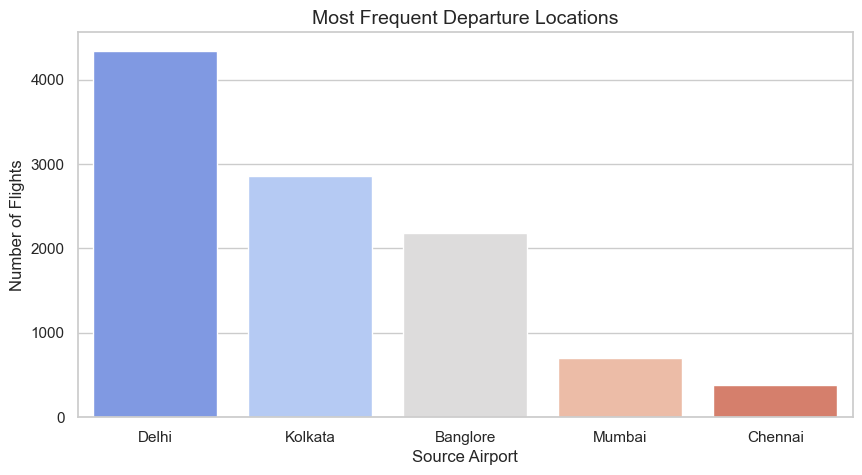

In [102]:
# Count of flights by source (departure location)
plt.figure(figsize=(10, 5))
sns.countplot(Df_train, x="Source", order=Df_train["Source"].value_counts().index, palette="coolwarm")
plt.title("Most Frequent Departure Locations", fontsize=14)
plt.xlabel("Source Airport")
plt.ylabel("Number of Flights")
plt.show()

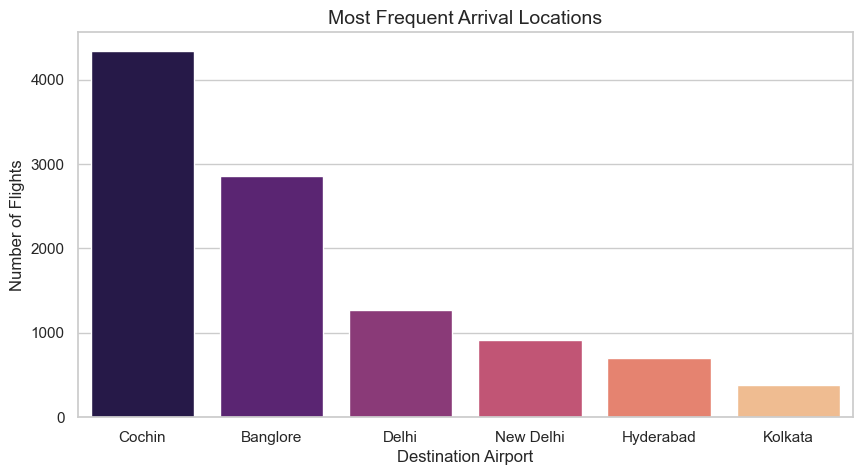

In [103]:
# Count of flights by destination (arrival location)
plt.figure(figsize=(10, 5))
sns.countplot(Df_train, x="Destination", order=Df_train["Destination"].value_counts().index, palette="magma")
plt.title("Most Frequent Arrival Locations", fontsize=14)
plt.xlabel("Destination Airport")
plt.ylabel("Number of Flights")
plt.show()

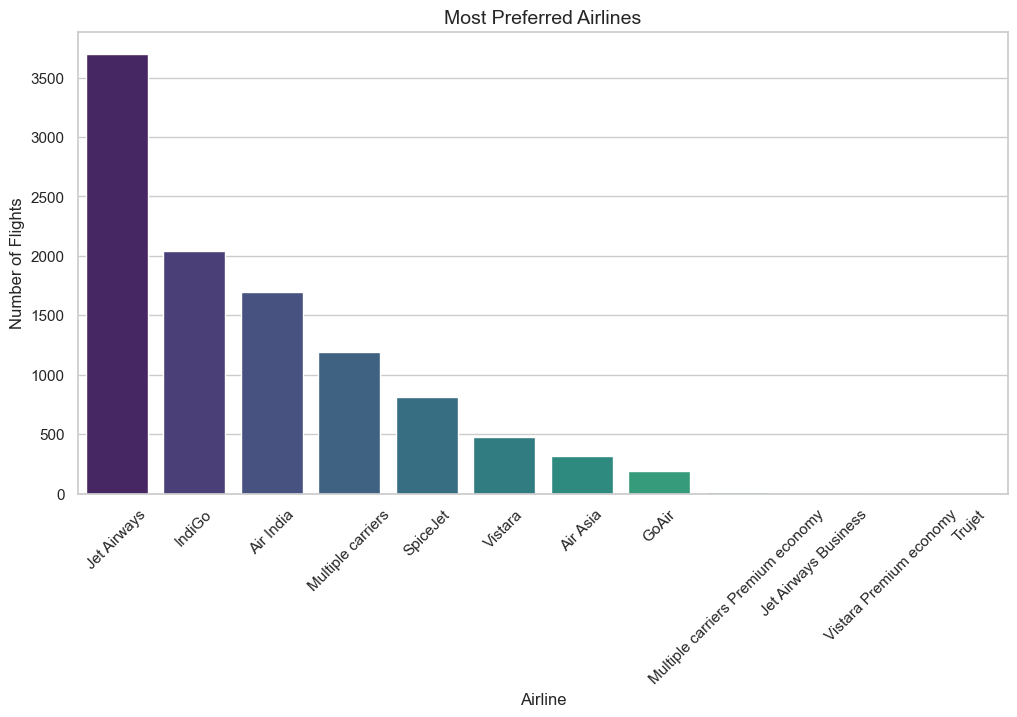

In [104]:
# Count of flights by airline
plt.figure(figsize=(12, 6))
sns.countplot(Df_train, x="Airline", order=Df_train["Airline"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Most Preferred Airlines", fontsize=14)
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.show()

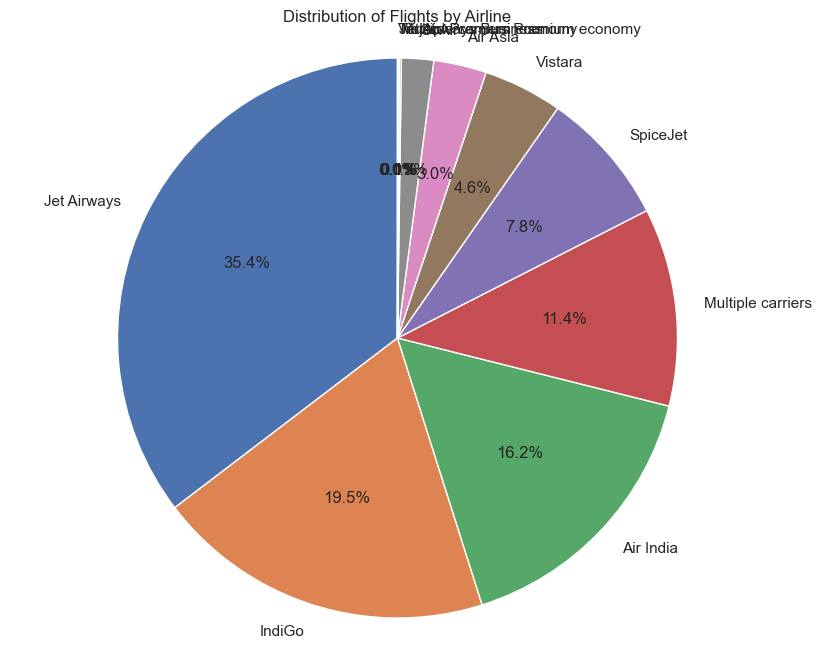

In [105]:
airline_counts = Df_train['Airline'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Flights by Airline')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

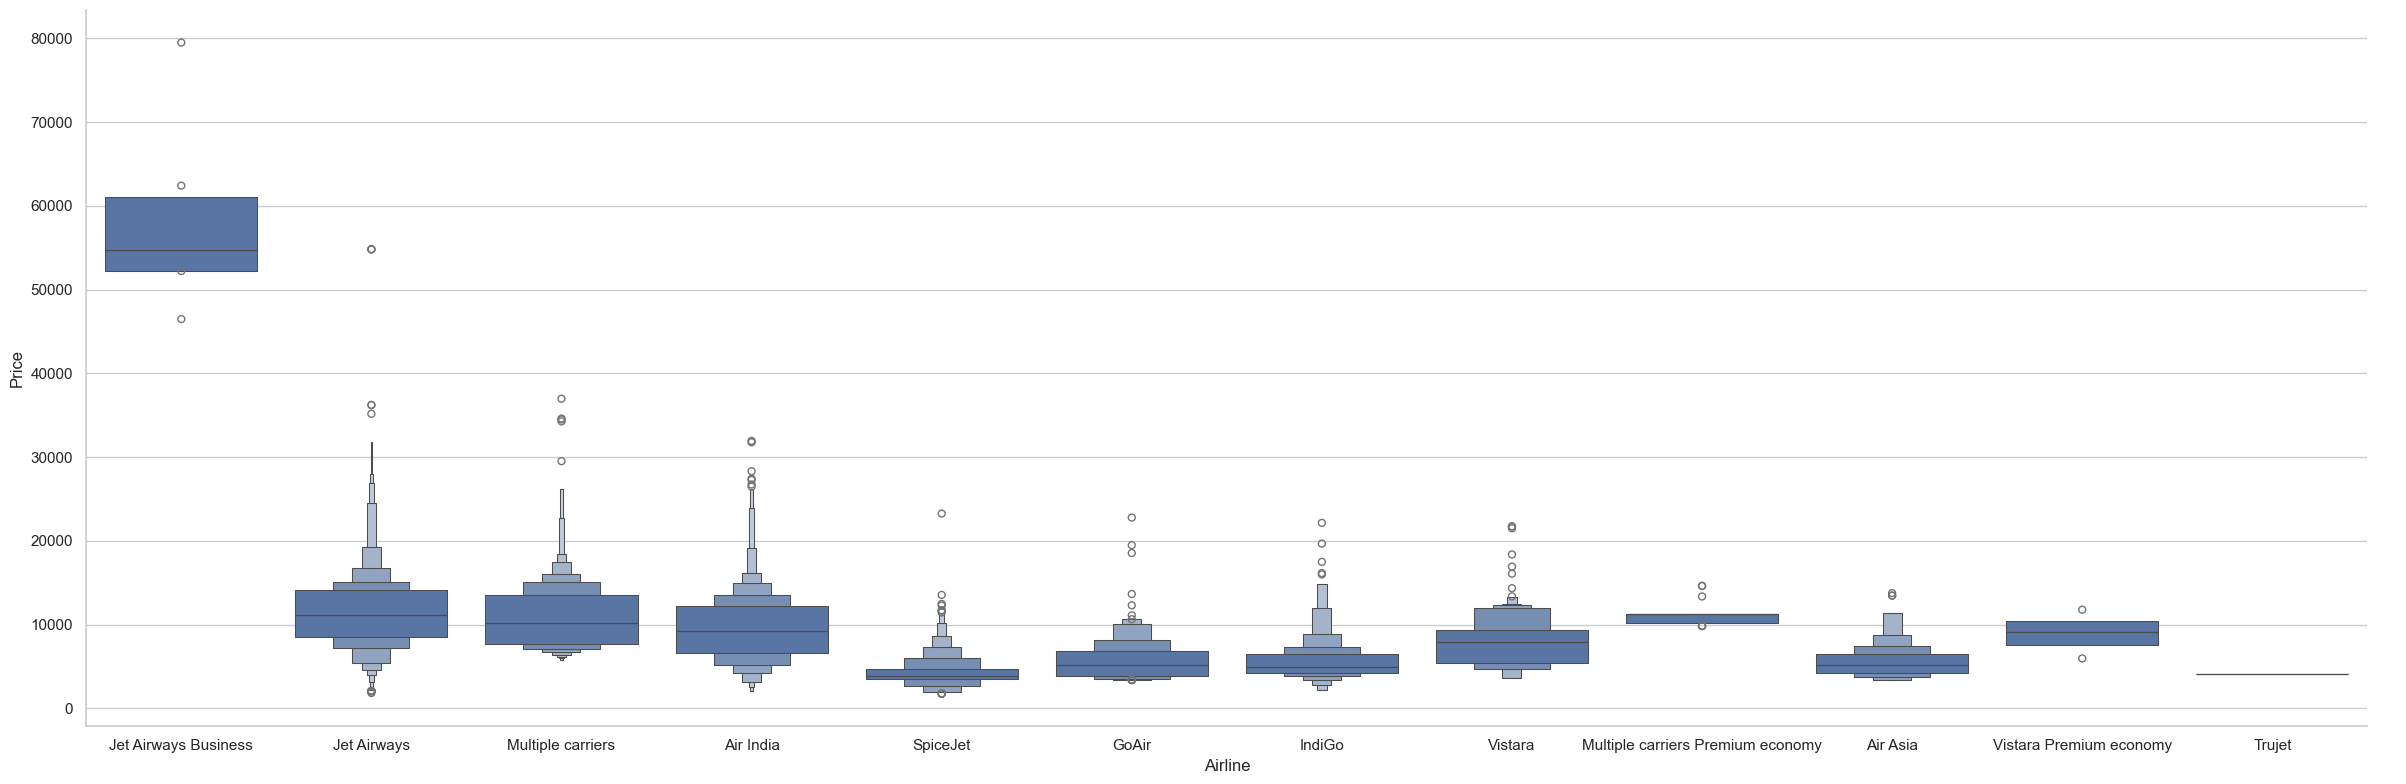

In [106]:
sns.catplot(y = "Price", x = "Airline", data = Df_train.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

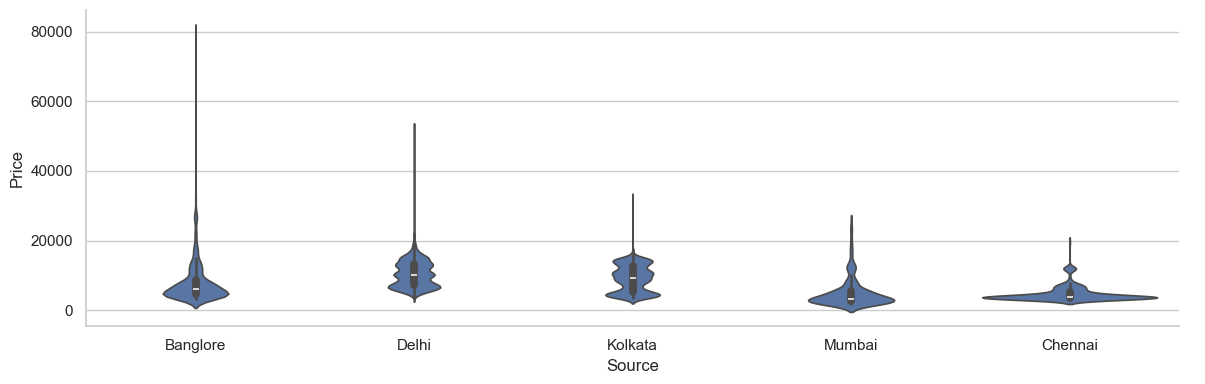

In [107]:
sns.catplot(y = "Price", x = "Source", data = Df_train.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

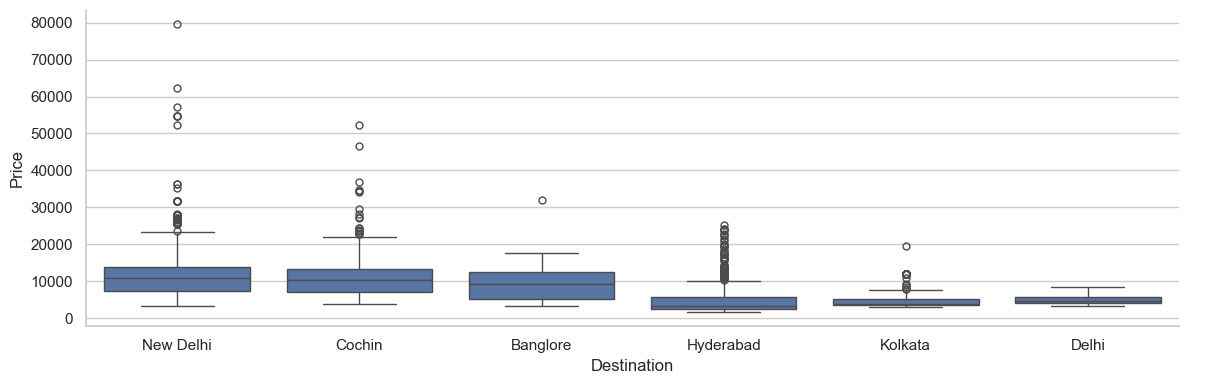

In [108]:
sns.catplot(y = "Price", x = "Destination", data = Df_train.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [109]:
# Convert 'Duration' column to string type before using .str accessor
Df_train['Duration'] = Df_train['Duration'].astype(str).str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [110]:
# Convert 'Duration' column to string type before using .str accessor
Df_test['Duration'] = Df_test['Duration'].astype(str).str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [111]:
Df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,7662,1,5,2019


In [112]:
Df_train["Dep_hour"] = pd.to_datetime(Df_train["Dep_Time"]).dt.hour
Df_train["Dep_min"] = pd.to_datetime(Df_train["Dep_Time"]).dt.minute
Df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [113]:
Df_test["Dep_hour"] = pd.to_datetime(Df_test["Dep_Time"]).dt.hour
Df_test["Dep_min"] = pd.to_datetime(Df_test["Dep_Time"]).dt.minute
Df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [114]:
Df_train["Arrival_hour"] = pd.to_datetime(Df_train.Arrival_Time).dt.hour
Df_train["Arrival_min"] = pd.to_datetime(Df_train.Arrival_Time).dt.minute
Df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [115]:
Df_test["Arrival_hour"] = pd.to_datetime(Df_test.Arrival_Time).dt.hour
Df_test["Arrival_min"] = pd.to_datetime(Df_test.Arrival_Time).dt.minute
Df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [116]:
Df_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,2019,5,50,13,15


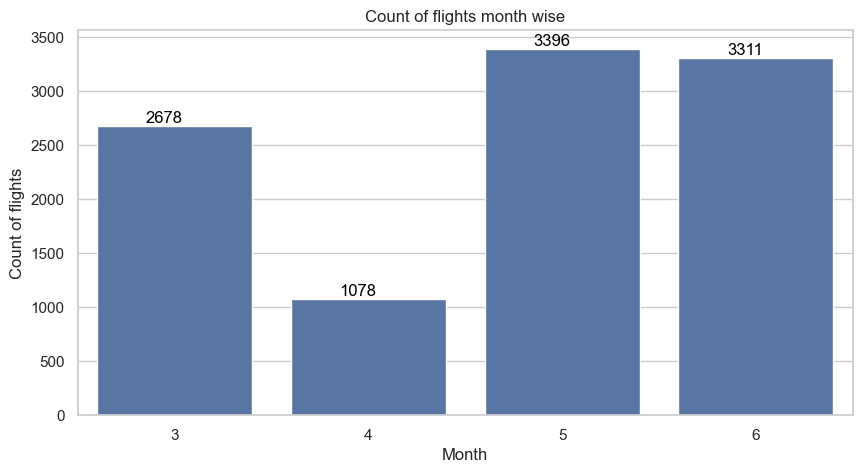

In [117]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = Df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [118]:
Df_train.Month.value_counts()

Month
5    3396
6    3311
3    2678
4    1078
Name: count, dtype: int64

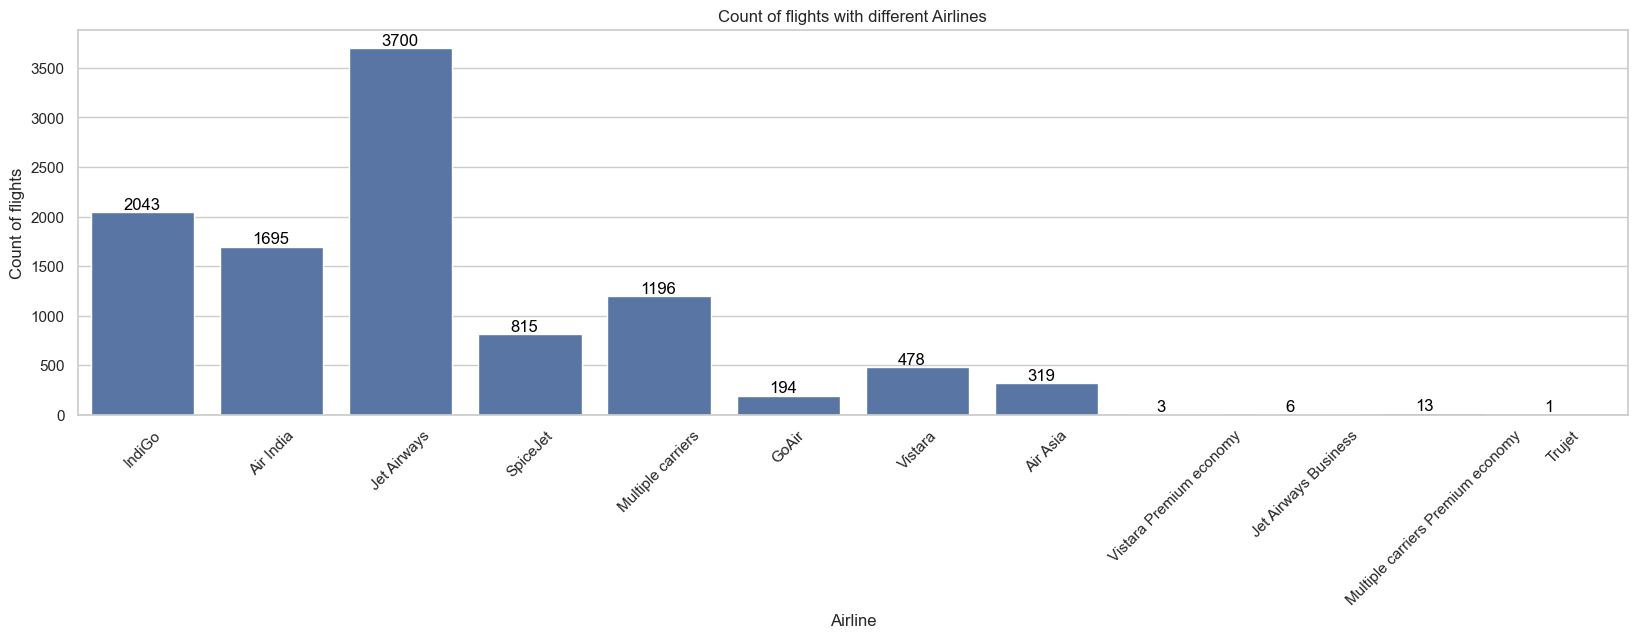

In [119]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =Df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

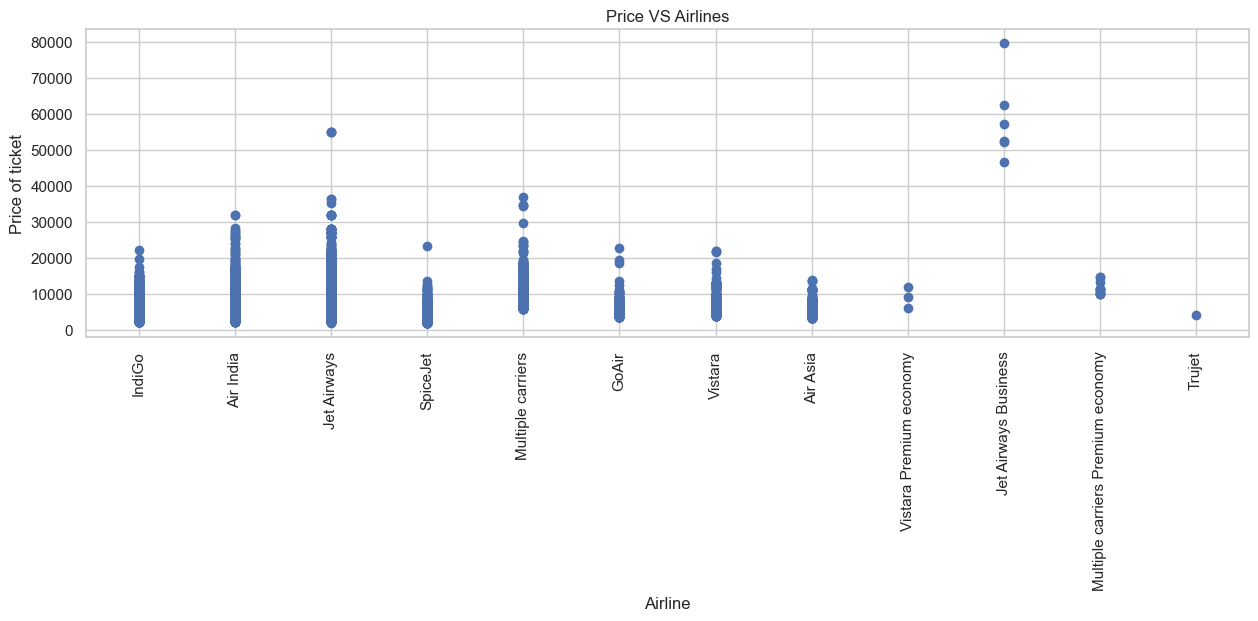

In [120]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(Df_train['Airline'], Df_train['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [121]:
Df_train.drop('Year', axis=1, inplace=True)

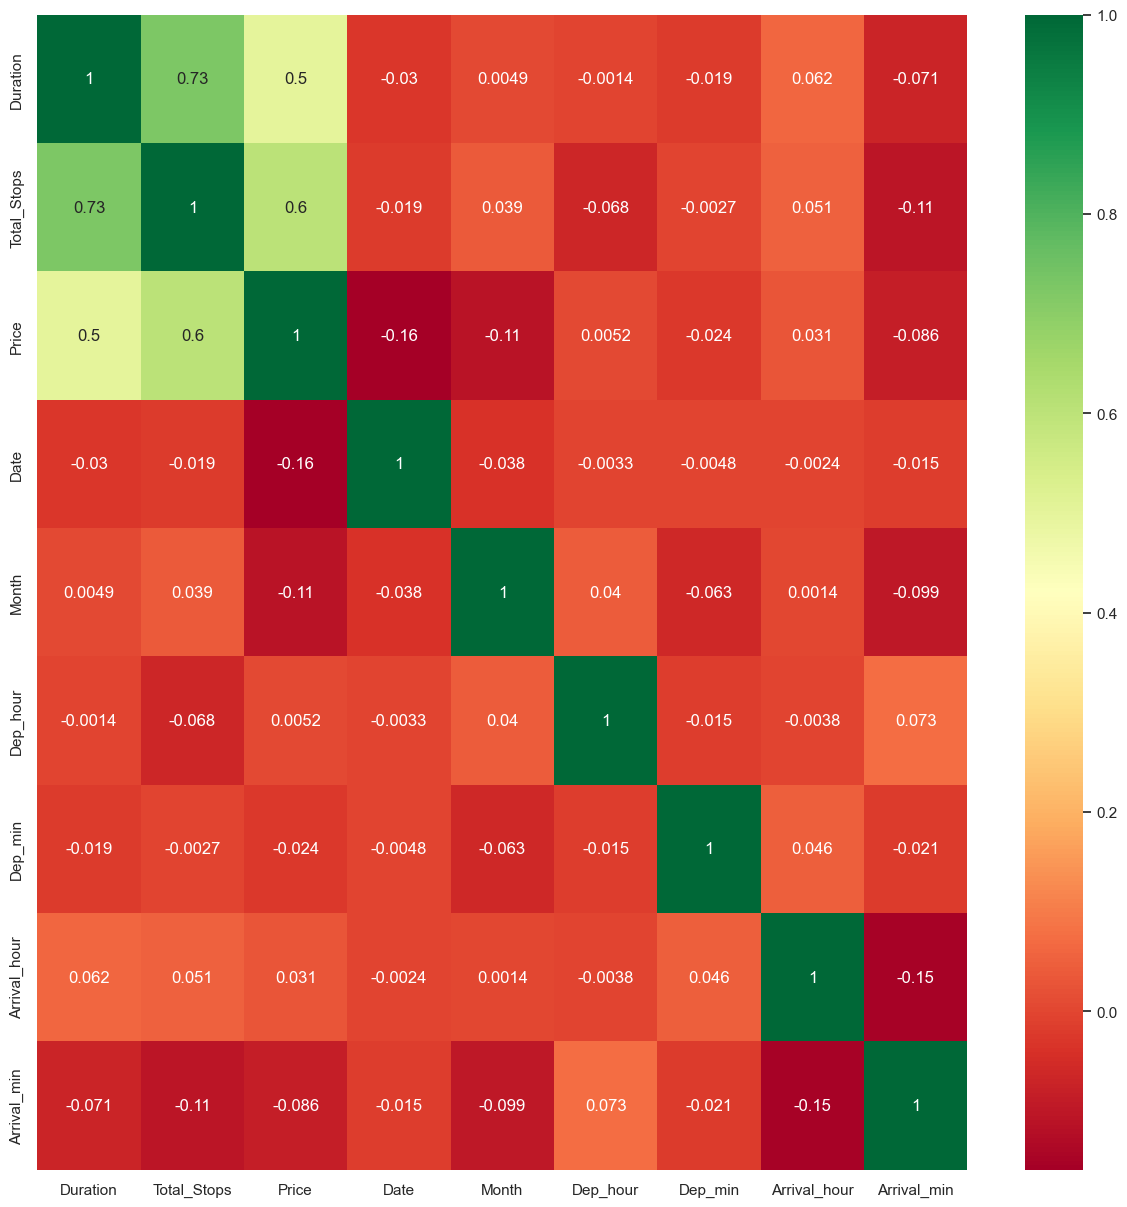

In [122]:
plt.figure(figsize = (15,15))
# Select only numerical features for correlation calculation
numerical_df = Df_train.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [123]:
# Dropping the Price
data = Df_train.drop(["Price"], axis=1)

In [124]:
# Categorical Data and Numerical Data
train_categorical_data = data.select_dtypes(include=['object'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = Df_test.select_dtypes(include=['object'])
test_numerical_data  = Df_test.select_dtypes(include=['int64', 'float','int32'])

__Building multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest,and checking the 
performance of your model__

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [126]:
train_categorical_data.head(1)

,Airline,Source,Destination,Route
0,IndiGo,Banglore,New Delhi,BLR → DEL


In [127]:
test_categorical_data.head(1)

,Airline,Source,Destination,Route
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK


In [128]:
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [129]:
train_categorical_data.head()

,Airline,Source,Destination,Route
0,3,0,5,18
1,1,3,0,84
2,4,2,1,118
3,3,3,0,91
4,3,0,5,29


In [130]:
test_categorical_data.head()

,Airline,Source,Destination,Route
0,4,2,1,76
1,3,3,0,65
2,4,2,1,76
3,6,2,1,76
4,0,0,2,16


In [131]:
test_data = pd.concat([test_categorical_data, test_numerical_data], axis=1)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,655,1,6,6,17,30,4,25
1,3,3,0,65,240,1,12,5,6,20,10,20
2,4,2,1,76,1425,1,21,5,19,15,19,0
3,6,2,1,76,780,1,21,5,8,0,21,0
4,0,0,2,16,170,0,24,6,23,55,2,45


In [132]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = Df_train['Price']


In [133]:
X.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0,24,3,22,20,1,10
1,1,3,0,84,445,2,1,5,5,50,13,15


In [134]:
from sklearn.preprocessing import StandardScaler

# Fit and transform training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)  # Learn mean & std from train, then transform

# Only transform test data using the same scaler
X_test_scaled = scaler.transform(test_data)  # Apply the same scaling

In [135]:
y_train_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [136]:
y_train_scaled


array([[-1.10924806],
       [-0.29509405],
       [ 1.04993593],
       ...,
       [-0.38872717],
       [ 0.78309236],
       [ 0.58955509]])

In [137]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size = 0.3, random_state = 42)

In [139]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7324, 12)
The size of training output is (7324,)
The size of testing input is (3139, 12)
The size of testing output is (3139,)


In [140]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [141]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [142]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  3523.749921307675
Mean Absolute % Error:  32
R-Squared:  0.4319805570665828


In [143]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [144]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [145]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  3523.4603900640127
Mean Absolute % Error:  32
R-Squared:  0.43207389661845363


In [146]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = linear_regressor.predict(X_train)
y_test_pred = linear_regressor.predict(X_test)

# Evaluate the model
print("Train Results for Linear Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Linear Regressor Model:
Root Mean Squared Error:  3523.2897726672995
Mean Absolute % Error:  32
R-Squared:  0.43212889694001144


__Compare all of the models and justify your choice about the optimum model by using different evaluation technique 
and tune the models as per the requirement.__

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}
linear_regressor = LinearRegression()
grid_search = GridSearchCV(linear_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_hyperparameters)
print("Best Score (Negative Mean Squared Error):", best_score)

# Use the best model to predict the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model (Example: using R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Score (Negative Mean Squared Error): -12447642.563072858
R-squared: 0.4446421082179105


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node
}

extra_trees_regressor = ExtraTreesRegressor(random_state=42)  # Initialize the regressor
grid_search = GridSearchCV(extra_trees_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


# Get the best model and its hyperparameters
best_extra_trees = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predicting train and test results using the best model
y_train_pred_et = best_extra_trees.predict(X_train)
y_test_pred_et = best_extra_trees.predict(X_test)


print("\nTrain Results for Extra Trees Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred_et)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_et)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_et))


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}

Train Results for Extra Trees Regressor Model:
Root Mean Squared Error:  1289.339701157629
Mean Absolute % Error:  8
R-Squared:  0.923952007447086


In [150]:
print("Test Results for Extra Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred_et)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_et)))
print("R-Squared: ", r2_score(y_test, y_test_pred_et))

Test Results for Extra Tree Regressor Model:
Root Mean Squared Error:  1731.4233376169068
Mean Absolute % Error:  12
R-Squared:  0.8520822131240351


In [151]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [152]:
# Predicting train and test results
y_train_pred_dt = tree.predict(X_train)
y_test_pred_dt = tree.predict(X_test)

In [153]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred_dt)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_dt)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_dt))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  1331.5089009488913
Mean Absolute % Error:  9
R-Squared:  0.9188962021920755


In [154]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test.values, y_test_pred_dt)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred_dt)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred_dt))

Test Results for Decision Tree Regressor Model:
Root Mean squared Error:  2494.0026929769588
Mean Absolute % Error:  14
R-Squared:  0.6930923580068928


In [155]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_regressor = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_regressor.fit(X_train,y_train)

y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred_rf)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rf)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_rf))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  1388.486383375518
Mean Absolute % Error:  9
R-Squared:  0.9118065578307699


In [156]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred_rf)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred_rf)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred_rf))

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  1838.893793236972
Mean Absolute % Error:  13
R-Squared:  0.8331496353261276


In [157]:
# Gradient Boosting with GridSearchCV
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
gb_regressor = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_regressor.fit(X_train, y_train)

y_train_pred_gb = gb_regressor.predict(X_train)
y_test_pred_gb = gb_regressor.predict(X_test)
print("\nTrain Results for Gradient Boosting Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred_gb)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_gb)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_gb))


Train Results for Gradient Boosting Regressor Model:
Root Mean Squared Error:  1388.7747452444594
Mean Absolute % Error:  11
R-Squared:  0.911769921869559


In [158]:
print("Test Results for Gradient Boosting Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred_gb)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred_gb)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred_gb))

Test Results for Gradient Boosting Regressor Model:
Root Mean Squared Error:  1779.5478346596788
Mean Absolute % Error:  14
R-Squared:  0.8437452604998875


In [159]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.naive_bayes import GaussianNB #For Naive Bayes

# AdaBoosting
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_regressor = GridSearchCV(AdaBoostRegressor(), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_regressor.fit(X_train, y_train)

y_train_pred_ada = ada_regressor.predict(X_train)
y_test_pred_ada = ada_regressor.predict(X_test)

print("\nTrain Results for AdaBoost Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred_ada)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_ada)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_ada))
print("Test Results for AdaBoost Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred_ada)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred_ada)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred_ada))


Train Results for AdaBoost Regressor Model:
Root Mean Squared Error:  2955.61399795269
Mean Absolute % Error:  30
R-Squared:  0.6003788431583108
Test Results for AdaBoost Regressor Model:
Root Mean Squared Error:  2961.0397176365277
Mean Absolute % Error:  30
R-Squared:  0.5673842446153572


In [160]:
bagging_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0]
}
bagging_regressor = GridSearchCV(BaggingRegressor(), bagging_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bagging_regressor.fit(X_train, y_train)


y_train_pred_bag = bagging_regressor.predict(X_train)
y_test_pred_bag = bagging_regressor.predict(X_test)

print("\nTrain Results for BaggingRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred_bag)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_bag)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_bag))
print("Test Results for BaggingRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred_bag)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred_bag)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred_bag))


Train Results for BaggingRegressor Model:
Root Mean Squared Error:  1153.75501497778
Mean Absolute % Error:  7
R-Squared:  0.9391051946269319
Test Results for BaggingRegressor Model:
Root Mean Squared Error:  1913.0800122792305
Mean Absolute % Error:  13
R-Squared:  0.8194156398029899


In [161]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train) #Fit model

y_train_pred_nb = naive_bayes.predict(X_train) #Predictions
y_test_pred_nb = naive_bayes.predict(X_test)


print("\nTrain Results for Naive Bayes Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred_nb)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_nb)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred_nb))
print("Test Results for Naive Bayes Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred_nb)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred_nb)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred_nb))


Train Results for Naive Bayes Model:
Root Mean Squared Error:  1807.6995845431288
Mean Absolute % Error:  10
R-Squared:  0.8505122656821386
Test Results for Naive Bayes Model:
Root Mean Squared Error:  2672.769703424484
Mean Absolute % Error:  16
R-Squared:  0.6475179984431245


In [162]:
ridge_score = round(ridge_regressor.score(X_train, y_train) * 100, 2)
ridge_score_test = round(ridge_regressor.score(X_test, y_test) * 100, 2)


lasso_score = round(lasso_regressor.score(X_train, y_train) * 100, 2)
lasso_score_test = round(lasso_regressor.score(X_test, y_test) * 100, 2)

decision_score = round(tree.score(X_train, y_train) * 100, 2)
decision_score_test = round(tree.score(X_test, y_test) * 100, 2)

random_score = round(rf_regressor.score(X_train, y_train) * 100, 2)
random_score_test = round(rf_regressor.score(X_test, y_test) * 100, 2)

gradient_score = round(gb_regressor.score(X_train, y_train) * 100, 2)
gradient_score_test = round(gb_regressor.score(X_test, y_test) * 100, 2)

ada_score = round(ada_regressor.score(X_train, y_train) * 100, 2)
ada_score_test = round(ada_regressor.score(X_test, y_test) * 100, 2)

bag_score = round(bagging_regressor.score(X_train, y_train) * 100, 2)
bag_score_test = round(bagging_regressor.score(X_test, y_test) * 100, 2)

navie_score = round(naive_bayes.score(X_train, y_train) * 100, 2)
navie_score_test = round(naive_bayes.score(X_test, y_test) * 100, 2)

extra_score = round(best_extra_trees.score(X_train, y_train) * 100, 2)
extra_score_test = round(best_extra_trees.score(X_test, y_test) * 100, 2)

rf_score = round(rf_regressor.score(X_train, y_train) * 100, 2)
rf_score_test = round(rf_regressor.score(X_test, y_test) * 100, 2)

In [163]:
models_Train = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression', 'Linear Regression', 'Extra Trees Regressor',
              'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor',
              'AdaBoost Regressor', 'Bagging Regressor', 'Naive Bayes'],
    'R-squared': [r2_score(y_train.values, y_train_pred), r2_score(y_train.values, y_train_pred), r2_score(y_train.values, y_train_pred), r2_score(y_train.values, y_train_pred_et),
                  r2_score(y_train.values, y_train_pred_dt), r2_score(y_train.values, y_train_pred_rf), r2_score(y_train.values, y_train_pred_gb),
                  r2_score(y_train.values, y_train_pred_ada), r2_score(y_train.values, y_train_pred_bag), r2_score(y_train.values, y_train_pred_nb)],
    'Root Mean Squared Error': [sqrt(mse(y_train.values, y_train_pred)), sqrt(mse(y_train.values, y_train_pred)), sqrt(mse(y_train.values, y_train_pred)), sqrt(mse(y_train.values, y_train_pred_et)),
                               sqrt(mse(y_train.values, y_train_pred_dt)), sqrt(mse(y_train.values, y_train_pred_rf)), sqrt(mse(y_train.values, y_train_pred_gb)),
                               sqrt(mse(y_train.values, y_train_pred_ada)), sqrt(mse(y_train.values, y_train_pred_bag)), sqrt(mse(y_train.values, y_train_pred_nb))],
    'Mean Absolute % Error': [round(mean_absolute_percentage_error(y_train.values, y_train_pred)), round(mean_absolute_percentage_error(y_train.values, y_train_pred)), round(mean_absolute_percentage_error(y_train.values, y_train_pred)), round(mean_absolute_percentage_error(y_train.values, y_train_pred_et)),
                              round(mean_absolute_percentage_error(y_train.values, y_train_pred_dt)), round(mean_absolute_percentage_error(y_train.values, y_train_pred_rf)), round(mean_absolute_percentage_error(y_train.values, y_train_pred_gb)),
                              round(mean_absolute_percentage_error(y_train.values, y_train_pred_ada)), round(mean_absolute_percentage_error(y_train.values, y_train_pred_bag)), round(mean_absolute_percentage_error(y_train.values, y_train_pred_nb))]
})

models_Train

,Model,R-squared,Root Mean Squared Error,Mean Absolute % Error
0,Ridge Regression,0.432129,3523.289773,32
1,Lasso Regression,0.432129,3523.289773,32
2,Linear Regression,0.432129,3523.289773,32
3,Extra Trees Regressor,0.923952,1289.339701,8
4,Decision Tree Regressor,0.918896,1331.508901,9
5,Random Forest Regressor,0.911807,1388.486383,9
6,Gradient Boosting Regressor,0.911770,1388.774745,11
7,AdaBoost Regressor,0.600379,2955.613998,30
8,Bagging Regressor,0.939105,1153.755015,7
9,Naive Bayes,0.850512,1807.699585,10


In [164]:
models_test = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression', 'Linear Regression', 'Extra Trees Regressor',
              'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor',
              'AdaBoost Regressor', 'Bagging Regressor', 'Naive Bayes'],
    'R-squared': [r2_score(y_test, y_test_pred), r2_score(y_test, y_test_pred), r2_score(y_test, y_test_pred), r2_score(y_test, y_test_pred_et),
                  r2_score(y_test, y_test_pred_dt), r2_score(y_test, y_test_pred_rf), r2_score(y_test, y_test_pred_gb),
                  r2_score(y_test, y_test_pred_ada), r2_score(y_test, y_test_pred_bag), r2_score(y_test, y_test_pred_nb)],
    'Root Mean Squared Error': [sqrt(mse(y_test, y_test_pred)), sqrt(mse(y_test, y_test_pred)), sqrt(mse(y_test, y_test_pred)), sqrt(mse(y_test, y_test_pred_et)),
                               sqrt(mse(y_test, y_test_pred_dt)), sqrt(mse(y_test, y_test_pred_rf)), sqrt(mse(y_test, y_test_pred_gb)),
                               sqrt(mse(y_test, y_test_pred_ada)), sqrt(mse(y_test, y_test_pred_bag)), sqrt(mse(y_test, y_test_pred_nb))],
    'Mean Absolute % Error': [round(mean_absolute_percentage_error(y_test, y_test_pred)), round(mean_absolute_percentage_error(y_test, y_test_pred)), round(mean_absolute_percentage_error(y_test, y_test_pred)), round(mean_absolute_percentage_error(y_test, y_test_pred_et)),
                              round(mean_absolute_percentage_error(y_test, y_test_pred_dt)), round(mean_absolute_percentage_error(y_test, y_test_pred_rf)), round(mean_absolute_percentage_error(y_test, y_test_pred_gb)),
                              round(mean_absolute_percentage_error(y_test, y_test_pred_ada)), round(mean_absolute_percentage_error(y_test, y_test_pred_bag)), round(mean_absolute_percentage_error(y_test, y_test_pred_nb))]
})

models_test

,Model,R-squared,Root Mean Squared Error,Mean Absolute % Error
0,Ridge Regression,0.444642,3354.899699,32
1,Lasso Regression,0.444642,3354.899699,32
2,Linear Regression,0.444642,3354.899699,32
3,Extra Trees Regressor,0.852082,1731.423338,12
4,Decision Tree Regressor,0.693092,2494.002693,14
5,Random Forest Regressor,0.833150,1838.893793,13
6,Gradient Boosting Regressor,0.843745,1779.547835,14
7,AdaBoost Regressor,0.567384,2961.039718,30
8,Bagging Regressor,0.819416,1913.080012,13
9,Naive Bayes,0.647518,2672.769703,16


In [168]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Identify categorical columns in the test data
categorical_cols = Df_test.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    Df_test[col] = label_encoder.fit_transform(Df_test[col])

# Verify the transformation
print(Df_test.head())

   Airline  Source  Destination  Route  Duration  Total_Stops  Date  Month  \
0        4       2            1     76       655            1     6      6   
1        3       3            0     65       240            1    12      5   
2        4       2            1     76      1425            1    21      5   
3        6       2            1     76       780            1    21      5   
4        0       0            2     16       170            0    24      6   

   Dep_hour  Dep_min  Arrival_hour  Arrival_min  
0        17       30             4           25  
1         6       20            10           20  
2        19       15            19            0  
3         8        0            21            0  
4        23       55             2           45  


In [170]:
# Create a dictionary to store predictions from each model
predictions = {}

# Predict with Lasso Regression
predictions['Lasso'] = lasso_regressor.predict(Df_test)


# Predict with Extra Trees Regressor
predictions['ExtraTrees'] = best_extra_trees.predict(Df_test)

# Predict with Decision Tree Regressor
predictions['DecisionTree'] = tree.predict(Df_test)

# Predict with Random Forest Regressor
predictions['RandomForest'] = rf_regressor.predict(Df_test)

# Predict with Gradient Boosting Regressor
predictions['GradientBoosting'] = gb_regressor.predict(Df_test)

# Predict with AdaBoost Regressor
predictions['AdaBoost'] = ada_regressor.predict(Df_test)

# Predict with Bagging Regressor
predictions['Bagging'] = bagging_regressor.predict(Df_test)

# Predict with Naive Bayes
predictions['NaiveBayes'] = naive_bayes.predict(Df_test)


# Create a DataFrame from the predictions
pred_df = pd.DataFrame(predictions)

#Save predictions to a CSV file
pred_df.to_csv('predictions 1.csv', index=False)

__CONCLUSION__

✅ 1. Extra Trees Regressor (⭐ Best Model)
$R^2$ = 0.85 (Highest) → Explains 85% of the variance in the data.
RMSE = 1731 → Lowest error among all models.
MAPE = 12% → Lowest relative error.
📌 Business Impact:
Most reliable predictions with low error.
Suitable for price forecasting, demand prediction, and decision-making.
Can handle non-linear relationships and feature importance analysis.

✅ 2. Gradient Boosting Regressor
$R^2$ = 0.84 → High accuracy, slightly less than Extra Trees.
RMSE = 1771 → Very close to Extra Trees.
MAPE = 14% → Slightly higher relative error.
📌 Business Impact:
Good for incremental learning, meaning new data can improve accuracy.
More stable than Random Forest, useful when precision is needed.

✅ 3. Random Forest Regressor
$R^2$ = 0.83, RMSE = 1827, MAPE = 14%
📌 Business Impact:
Stable, interpretable, and robust for predictions.
Handles missing values and outliers better than linear models.
Slightly higher error than Extra Trees, but still a good choice.

🔹 Moderate Performing Models
🔶 4. Decision Tree Regressor
$R^2$ = 0.74, RMSE = 2269, MAPE = 14%
📌 Business Insight:
Less stable compared to ensemble models like Random Forest.
Works well with small datasets, but not as strong for large-scale predictions.

📌 Final Business Recommendations
Category	Models	Business Decision
🏆 Best Models (High Accuracy)	Extra Trees, Gradient Boosting, Random Forest	✅ Use for production/business decisions.
📉 Moderate Models (Decent Performance)	Decision Tree, Ridge, Lasso, Linear Regression	⚠️ Use only if interpretability is more important than accuracy.
🚨 Worst Models (High Error)	AdaBoost, Naïve Bayes	❌ Avoid for business use.